In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math

In [2]:
data1 = pd.read_csv('table1.csv', header=None)
data1

,0,1,2,3,4,5,6
0,1,10000,Предварительный медосмотр,1.0,платные услуги,2023-01-09 09:37:29,528220.0
1,2,10000,Предварительный медосмотр,1.0,платные услуги,2023-01-09 09:45:52,525200.0
2,3,10000,Предварительный медосмотр,1.0,платные услуги,2023-01-09 09:50:47,478844.0
3,4,10000,Предварительный медосмотр,1.0,платные услуги,2023-01-09 10:32:19,496551.0
4,5,10000,Предварительный медосмотр,1.0,платные услуги,2023-02-16 08:09:00,526664.0
...,...,...,...,...,...,...,...
101305,101306,osm9,Осмотр невролога,161.0,ДМС,2023-12-07 09:52:21,477804.0
101306,101307,osm9,Осмотр невролога,30.0,ДМС,2023-12-07 11:59:51,536905.0
101307,101308,osm9,Осмотр невролога,25.0,ДМС,2023-12-07 12:29:45,539036.0
101308,101309,osm9,Осмотр невролога,161.0,ДМС,2023-12-07 15:13:49,482060.0


In [3]:
data1= data1.rename(columns={0: 'id', 1: 'actiontype_id', 2:'actiontype_name', 3: 'price', 4: 'contract_type', 5: 'createdate', 6: 'client_id'})

In [4]:
data1.dtypes

id                   int64
actiontype_id       object
actiontype_name     object
price              float64
contract_type       object
createdate          object
client_id          float64
dtype: object

In [5]:
data2 = pd.read_csv('table2.csv', header=None)
data2

,0,1,2,3,4,5,6
0,1,*11606,Кровь на TORCH инфекции,4500,2014,2022-10-01,2200-01-01
1,2,*11606,Кровь на TORCH инфекции,4500,"ООО ""Британский Страховой Дом""",2022-10-01,2200-01-01
2,3,*11606,Кровь на TORCH инфекции,4500,"ООО ""Русттекс""",2022-10-01,2200-01-01
3,4,*11606,Кровь на TORCH инфекции,4500,"ЗАО ""СК ""ТРАНСНЕФТЬ""",2022-10-01,2200-01-01
4,5,*11606,Кровь на TORCH инфекции,4500,"ОАО ""ЖАСО""",2022-10-01,2200-01-01
...,...,...,...,...,...,...,...
73211,73212,90213,Перемещение по Проитцу,580,Хочу все!,2022-10-01,2200-01-01
73212,73213,90213,Перемещение по Проитцу,580,"САО ""ВСК"" БЗ",2022-10-01,2200-01-01
73213,73214,90213,Перемещение по Проитцу,580,"ООО ""НМС""",2022-10-01,2200-01-01
73214,73215,90213,Перемещение по Проитцу,580,"ООО ""Зетта Страхование жизни""",2022-10-01,2200-01-01


In [6]:
data2.dtypes

0     int64
1    object
2    object
3     int64
4    object
5    object
6    object
dtype: object

In [7]:
data2= data2.rename(columns={0: 'id', 1: 'actiontype_id', 2:'actiontype_name', 3: 'price', 4: 'contract_name', 5: 'contract_createdate', 6: 'contract_enddate'})

In [8]:
data1 = data1.drop(columns=['id'])

In [9]:
data2 = data2.drop(columns=['id'])

In [10]:
data2 = data2.astype({'price':'float'})

In [11]:
data1 = data1.drop(columns=['client_id'])

In [12]:
data1['createdate'] = pd.to_datetime(data1['createdate'])

In [13]:
data2['contract_createdate'] = pd.to_datetime(data2['contract_createdate'])
data2['contract_enddate'] = pd.to_datetime(data2['contract_enddate'])

In [14]:
service= data1.copy()
service

,actiontype_id,actiontype_name,price,contract_type,createdate
0,10000,Предварительный медосмотр,1.0,платные услуги,2023-01-09 09:37:29
1,10000,Предварительный медосмотр,1.0,платные услуги,2023-01-09 09:45:52
2,10000,Предварительный медосмотр,1.0,платные услуги,2023-01-09 09:50:47
3,10000,Предварительный медосмотр,1.0,платные услуги,2023-01-09 10:32:19
4,10000,Предварительный медосмотр,1.0,платные услуги,2023-02-16 08:09:00
...,...,...,...,...,...
101305,osm9,Осмотр невролога,161.0,ДМС,2023-12-07 09:52:21
101306,osm9,Осмотр невролога,30.0,ДМС,2023-12-07 11:59:51
101307,osm9,Осмотр невролога,25.0,ДМС,2023-12-07 12:29:45
101308,osm9,Осмотр невролога,161.0,ДМС,2023-12-07 15:13:49


In [15]:
contrat_service =data2.copy()

In [16]:
contrat_service.head()

,actiontype_id,actiontype_name,price,contract_name,contract_createdate,contract_enddate
0,*11606,Кровь на TORCH инфекции,4500.0,2014,2022-10-01,2200-01-01
1,*11606,Кровь на TORCH инфекции,4500.0,"ООО ""Британский Страховой Дом""",2022-10-01,2200-01-01
2,*11606,Кровь на TORCH инфекции,4500.0,"ООО ""Русттекс""",2022-10-01,2200-01-01
3,*11606,Кровь на TORCH инфекции,4500.0,"ЗАО ""СК ""ТРАНСНЕФТЬ""",2022-10-01,2200-01-01
4,*11606,Кровь на TORCH инфекции,4500.0,"ОАО ""ЖАСО""",2022-10-01,2200-01-01


In [17]:
'''service'''
# +1. посмотреть уникальные action_type's
# +2. уникальные contract_type
# +3. группировка: actiontype_id, actiontype_name, price - contract (посмотреть различия одинаковых услуг по контрактам)
# +4. табличка excel

''' contrat_service '''
# 1. + чекнуть уникальные action_type's 
# 2. + уникальные contract_name - и даты
# 3. + группировка: actiontype_id, actiontype_name, price - contract (посмотреть различия одинаковых услуг по контрактам)


' contrat_service '

In [18]:
service.isnull().sum()

actiontype_id       0
actiontype_name     0
price              84
contract_type      84
createdate          0
dtype: int64

In [19]:
service = service.dropna()

In [20]:
df_actiontype_service = service.actiontype_id.unique()
pd.Series(df_actiontype_service)

0         10000
1         10001
2         10002
3         10004
4         10005
         ...   
633    osm6_1_1
634        osm7
635        osm8
636      osm8_1
637        osm9
Length: 638, dtype: object

In [21]:
df_actiontype_id_service = service.actiontype_id.unique()
pd.Series(df_actiontype_id_service)

0         10000
1         10001
2         10002
3         10004
4         10005
         ...   
633    osm6_1_1
634        osm7
635        osm8
636      osm8_1
637        osm9
Length: 638, dtype: object

In [22]:
df_actiontype_name_service = service.actiontype_name.unique()
pd.Series(df_actiontype_name_service)

# difference count 4 rows actiontype_id & actiontype_name

0       Предварительный медосмотр
1            Взятие крови из вены
2                    В/в вливания
3              В/м и п/к инъекции
4           Постановка капельницы
                  ...            
628      Первичный осмотр хирурга
629    Первичный осмотр терапевта
630               Прием терапевта
631    Повторный осмотр терапевта
632              Осмотр невролога
Length: 633, dtype: object

In [23]:
df_contract_type = service.contract_type.unique()
pd.Series(df_contract_type)

0    платные услуги
1               ДМС
2            бюджет
dtype: object

In [24]:
s =service.groupby(['actiontype_id', 'actiontype_name', 'price'], as_index=False) \
    .agg({'actiontype_id': 'count'}) \
    .sort_values('actiontype_id', ascending=False) \
    .rename(columns={'actiontype_id': 'count_at'})

s

,actiontype_name,price,count_at
1196,Прием офтальмолога,160.0,5298
1195,Прием оториноларинголог,160.0,5254
1142,Биомикроскопия глаза,160.0,4921
1145,Визометрия,160.0,4919
1148,Тональная пороговая аудиометрия,160.0,4813
...,...,...,...
1343,УЗИ мягких тканей (одной анатомической области),7.0,1
530,Альбумин,161.0,1
529,Альбумин,25.0,1
1342,УЗИ молочных желез с лимфо узлами,169.0,1


In [25]:
s.describe()

,price,count_at
count,2507.000000,2507.000000
mean,83.690866,40.377343
std,72.477950,322.195998
min,1.000000,1.000000
25%,17.000000,1.000000
50%,30.000000,3.000000
75%,161.000000,8.000000
max,169.000000,5298.000000


In [26]:
budget = service.query('contract_type ==  "бюджет" ')
budget.head()

,actiontype_id,actiontype_name,price,contract_type,createdate
14151,14009,Прием гинеколога,160.0,бюджет,2023-01-09 08:36:39
14152,14009,Прием гинеколога,160.0,бюджет,2023-01-09 08:40:46
14153,14009,Прием гинеколога,160.0,бюджет,2023-01-09 08:42:37
14154,14009,Прием гинеколога,160.0,бюджет,2023-01-09 09:50:31
14155,14009,Прием гинеколога,160.0,бюджет,2023-01-10 08:23:40


In [27]:
dms = service.query('contract_type ==  "ДМС" ')
dms.head()

,actiontype_id,actiontype_name,price,contract_type,createdate
24,10001,Взятие крови из вены,161.0,ДМС,2023-01-09 09:17:31
25,10001,Взятие крови из вены,166.0,ДМС,2023-01-09 09:41:17
26,10001,Взятие крови из вены,166.0,ДМС,2023-01-10 09:29:43
29,10001,Взятие крови из вены,166.0,ДМС,2023-01-12 09:15:55
30,10001,Взятие крови из вены,166.0,ДМС,2023-01-12 09:16:58


In [28]:
paid_services = service.query('contract_type ==  "платные услуги" ')
paid_services.head()

,actiontype_id,actiontype_name,price,contract_type,createdate
0,10000,Предварительный медосмотр,1.0,платные услуги,2023-01-09 09:37:29
1,10000,Предварительный медосмотр,1.0,платные услуги,2023-01-09 09:45:52
2,10000,Предварительный медосмотр,1.0,платные услуги,2023-01-09 09:50:47
3,10000,Предварительный медосмотр,1.0,платные услуги,2023-01-09 10:32:19
4,10000,Предварительный медосмотр,1.0,платные услуги,2023-02-16 08:09:00


In [29]:
s_count = service.groupby(['contract_type'], as_index=False) \
    .agg({'actiontype_id': 'count'}) \
    .sort_values('actiontype_id', ascending=False) \
    .rename(columns={'actiontype_id': 'count_contract'})
    
persent_s= round(s_count.count_contract * 100 / s_count.count_contract.sum(), 2)

s_count = s_count.merge(persent_s, left_index=True, right_index=True) \
.rename(columns= {'count_contract_x': 'count_contract', 'count_contract_y': 'contract %'})
s_count

,contract_type,count_contract,contract %
1,бюджет,68035,67.21
0,ДМС,29531,29.17
2,платные услуги,3660,3.62


In [30]:
service['actiontype_name'].value_counts()

actiontype_name
Прием офтальмолога                               5298
Прием оториноларинголог                          5254
Биомикроскопия глаза                             4921
Визометрия                                       4919
Тональная пороговая аудиометрия                  4813
                                                 ... 
Удаление экзостоза (от четырех и более зубов)       1
ПРОФИЛЬ «Перед вакцинацией»                         1
Mycoplasma hominis               Real-time          1
Коронка пластмассовая                               1
Посев на дрожжеподобные грибы                       1
Name: count, Length: 633, dtype: int64

In [31]:
budget_max = budget.groupby((['contract_type','actiontype_name']), as_index=False) \
    .agg({'actiontype_id': 'count'}) \
    .sort_values('actiontype_id', ascending=False) \
    .head(1)
budget_max

,contract_type,actiontype_name,actiontype_id
34,бюджет,Прием офтальмолога,5298


In [32]:
dms_max = dms.groupby((['contract_type','actiontype_name']), as_index=False) \
    .agg({'actiontype_id': 'count'}) \
    .sort_values('actiontype_id', ascending=False) \
    .head(1)
dms_max

,contract_type,actiontype_name,actiontype_id
113,ДМС,Взятие крови из вены,1436


In [33]:
paid_services_max = paid_services.groupby((['contract_type','actiontype_name']), as_index=False) \
    .agg({'actiontype_id': 'count'}) \
    .sort_values('actiontype_id', ascending=False) \
    .head(1)
paid_services_max

,contract_type,actiontype_name,actiontype_id
48,платные услуги,Выдача результатов проведенного Rg исследовани...,182


In [34]:
df= pd.concat([paid_services_max, dms_max, budget_max]) \
    .rename(columns={'actiontype_name': 'popular_at', 'actiontype_id':'popular_at_count'}) \
    .sort_values('popular_at_count', ascending=False) 
df

,contract_type,popular_at,popular_at_count
34,бюджет,Прием офтальмолога,5298
113,ДМС,Взятие крови из вены,1436
48,платные услуги,Выдача результатов проведенного Rg исследовани...,182


In [35]:
result = s_count.merge(df)
result

,contract_type,count_contract,contract %,popular_at,popular_at_count
0,бюджет,68035,67.21,Прием офтальмолога,5298
1,ДМС,29531,29.17,Взятие крови из вены,1436
2,платные услуги,3660,3.62,Выдача результатов проведенного Rg исследовани...,182


In [36]:
###############################################################################

In [37]:
contrat_service

,actiontype_id,actiontype_name,price,contract_name,contract_createdate,contract_enddate
0,*11606,Кровь на TORCH инфекции,4500.0,2014,2022-10-01,2200-01-01
1,*11606,Кровь на TORCH инфекции,4500.0,"ООО ""Британский Страховой Дом""",2022-10-01,2200-01-01
2,*11606,Кровь на TORCH инфекции,4500.0,"ООО ""Русттекс""",2022-10-01,2200-01-01
3,*11606,Кровь на TORCH инфекции,4500.0,"ЗАО ""СК ""ТРАНСНЕФТЬ""",2022-10-01,2200-01-01
4,*11606,Кровь на TORCH инфекции,4500.0,"ОАО ""ЖАСО""",2022-10-01,2200-01-01
...,...,...,...,...,...,...
73211,90213,Перемещение по Проитцу,580.0,Хочу все!,2022-10-01,2200-01-01
73212,90213,Перемещение по Проитцу,580.0,"САО ""ВСК"" БЗ",2022-10-01,2200-01-01
73213,90213,Перемещение по Проитцу,580.0,"ООО ""НМС""",2022-10-01,2200-01-01
73214,90213,Перемещение по Проитцу,580.0,"ООО ""Зетта Страхование жизни""",2022-10-01,2200-01-01


In [38]:
contrat_service['actiontype_name'].value_counts()

actiontype_name
Удаление фибромы                                             264
Удаление ангиомы                                             264
Удаление кожного рога                                        264
Удаление пиогенной гранулемы                                 264
Удаление дерматофибромы                                      264
                                                            ... 
Индивидуальное занятие ЛФК при беременности ( 1 занятие)      66
Стопотерапия                                                  66
Индивидуальные занятия ЛФК при заболеваниях внутр.органов     66
Перемещение по Проитцу                                        66
Металлокерамическая коронка (без зуботехнических работ)       65
Name: count, Length: 1045, dtype: int64

In [39]:
contrat_service['contract_name'].value_counts()

contract_name
2014                                                        2184
ООО "Медцентр"                                              2184
САО "ВСК" БЗ                                                1093
ООО "Адвант-Страхование"                                    1092
ЗАО "Страховая бизнес группа"                               1092
                                                            ... 
ОАО "Научно-производственное объединение "Прибор"             13
Общество с ограниченной ответственностью "НордСтройРент"      13
ЗАО "Новбытхим"                                               13
ЗАО "Морской вокзал"                                          13
ЗАО «ОПТЭК»                                                   13
Name: count, Length: 152, dtype: int64

In [40]:
contrat_service.dtypes

actiontype_id                  object
actiontype_name                object
price                         float64
contract_name                  object
contract_createdate    datetime64[ns]
contract_enddate       datetime64[ns]
dtype: object

In [41]:
cs_price = contrat_service.groupby(['actiontype_name'], as_index=False) \
    .agg({'price': 'max'}) \
    .sort_values('price', ascending=False)
cs_price.head()

,actiontype_name,price
1044,бюгельный протез с аттачминами,25000.0
502,Нейлоновый протез,22000.0
207,Гибкий протез Акрифри,20000.0
142,Бюгельный протез с кламерами,16500.0
141,Бюгельный протез с аттачминами (без зуботехнич...,15000.0


Text(0.5, 1.0, 'Популярные контракты мед.услуг')

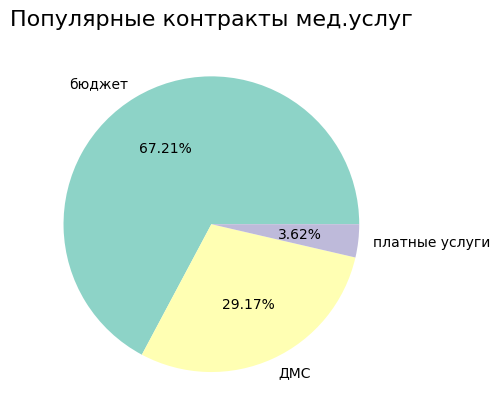

In [42]:
plt.pie(result['count_contract'], labels=result['contract_type'],
        autopct='%1.2f%%', colors=sns.color_palette('Set3'))

plt.title(label="Популярные контракты мед.услуг", 
    fontdict={"fontsize":16}, pad=10)

In [43]:
service.query('createdate > "2023-12" ')

,actiontype_id,actiontype_name,price,contract_type,createdate
1534,10001,Взятие крови из вены,161.0,ДМС,2023-12-01 08:31:02
1535,10001,Взятие крови из вены,161.0,ДМС,2023-12-01 08:31:34
1536,10001,Взятие крови из вены,29.0,ДМС,2023-12-01 08:39:30
1537,10001,Взятие крови из вены,28.0,ДМС,2023-12-01 08:40:10
1538,10001,Взятие крови из вены,157.0,ДМС,2023-12-01 08:47:24
...,...,...,...,...,...
101305,osm9,Осмотр невролога,161.0,ДМС,2023-12-07 09:52:21
101306,osm9,Осмотр невролога,30.0,ДМС,2023-12-07 11:59:51
101307,osm9,Осмотр невролога,25.0,ДМС,2023-12-07 12:29:45
101308,osm9,Осмотр невролога,161.0,ДМС,2023-12-07 15:13:49
